In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, levene, zscore, f_oneway

In [2]:
df = pd.read_csv('data/ludnosc_woj_slaskie.csv', sep=";")
df

,Rok,Katowice,Chorzów,Częstochowa,Sosnowiec,Bielsko-Biała
0,1990.0,366798.0,131902.0,257957.0,259353.0,181278.0
1,1991.0,366882.0,131536.0,258689.0,259025.0,184421.0
2,1992.0,359887.0,128832.0,259556.0,251279.0,179689.0
3,1993.0,359408.0,127049.0,259864.0,250398.0,180953.0
4,1994.0,355056.0,126489.0,259825.0,248927.0,180294.0
5,1995.0,351521.0,125226.0,259135.0,247499.0,180397.0
6,1996.0,350974.0,123608.0,258886.0,246313.0,180340.0
7,1997.0,348974.0,123045.0,258193.0,244085.0,179835.0
8,1998.0,345934.0,121708.0,257812.0,244102.0,180307.0
9,1999.0,333244.0,119501.0,254071.0,235662.0,178936.0


In [3]:
df.dropna(inplace=True)
df

,Rok,Katowice,Chorzów,Częstochowa,Sosnowiec,Bielsko-Biała
0,1990.0,366798.0,131902.0,257957.0,259353.0,181278.0
1,1991.0,366882.0,131536.0,258689.0,259025.0,184421.0
2,1992.0,359887.0,128832.0,259556.0,251279.0,179689.0
3,1993.0,359408.0,127049.0,259864.0,250398.0,180953.0
4,1994.0,355056.0,126489.0,259825.0,248927.0,180294.0
5,1995.0,351521.0,125226.0,259135.0,247499.0,180397.0
6,1996.0,350974.0,123608.0,258886.0,246313.0,180340.0
7,1997.0,348974.0,123045.0,258193.0,244085.0,179835.0
8,1998.0,345934.0,121708.0,257812.0,244102.0,180307.0
9,1999.0,333244.0,119501.0,254071.0,235662.0,178936.0


In [4]:
df['Rok'] = df['Rok'].astype(int)
df['Katowice'] = df['Katowice'].astype(int)
df['Chorzów'] = df['Chorzów'].astype(int)
df['Częstochowa'] = df['Częstochowa'].astype(int)
df['Sosnowiec'] = df['Sosnowiec'].astype(int)
df['Bielsko-Biała'] = df['Bielsko-Biała'].astype(int)
df

,Rok,Katowice,Chorzów,Częstochowa,Sosnowiec,Bielsko-Biała
0,1990,366798,131902,257957,259353,181278
1,1991,366882,131536,258689,259025,184421
2,1992,359887,128832,259556,251279,179689
3,1993,359408,127049,259864,250398,180953
4,1994,355056,126489,259825,248927,180294
5,1995,351521,125226,259135,247499,180397
6,1996,350974,123608,258886,246313,180340
7,1997,348974,123045,258193,244085,179835
8,1998,345934,121708,257812,244102,180307
9,1999,333244,119501,254071,235662,178936


# Wykres zmian ludności woj. śląskiego 

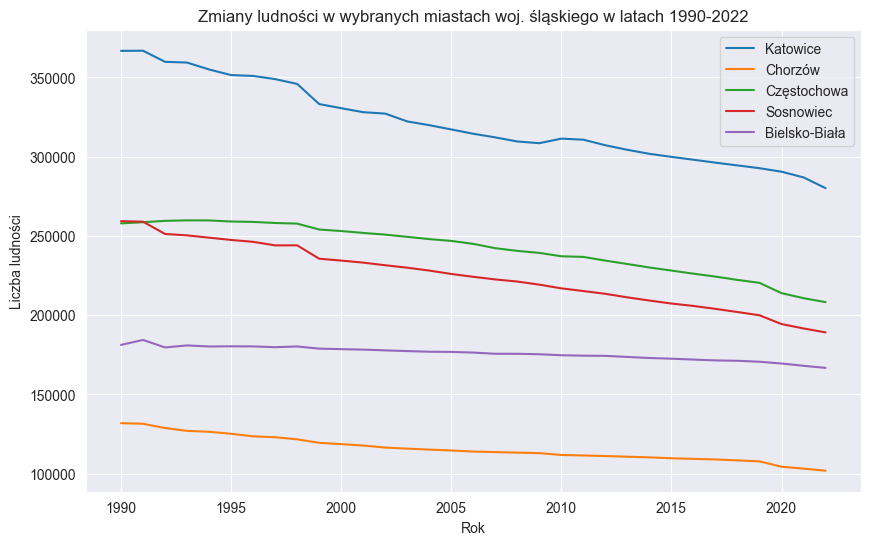

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Rok'], df['Katowice'], label='Katowice')
plt.plot(df['Rok'], df['Chorzów'], label='Chorzów')
plt.plot(df['Rok'], df['Częstochowa'], label='Częstochowa')
plt.plot(df['Rok'], df['Sosnowiec'], label='Sosnowiec')
plt.plot(df['Rok'], df['Bielsko-Biała'], label='Bielsko-Biała')
plt.title('Zmiany ludności w wybranych miastach woj. śląskiego w latach 1990-2022')
plt.xlabel('Rok')
plt.ylabel('Liczba ludności')
plt.legend()
plt.grid(True)
plt.show()

# Wykres zmian przyrostów ludności

In [6]:
df['Katowice: przyrost'] = df['Katowice'].diff().fillna(0).astype(int)
df['Chorzów: przyrost'] = df['Chorzów'].diff().fillna(0).astype(int)
df['Częstochowa: przyrost'] = df['Częstochowa'].diff().fillna(0).astype(int)
df['Sosnowiec: przyrost'] = df['Sosnowiec'].diff().fillna(0).astype(int)
df['Bielsko-Biała: przyrost'] = df['Bielsko-Biała'].diff().fillna(0).astype(int)
df

,Rok,Katowice,Chorzów,Częstochowa,Sosnowiec,Bielsko-Biała,Katowice: przyrost,Chorzów: przyrost,Częstochowa: przyrost,Sosnowiec: przyrost,Bielsko-Biała: przyrost
0,1990,366798,131902,257957,259353,181278,0,0,0,0,0
1,1991,366882,131536,258689,259025,184421,84,-366,732,-328,3143
2,1992,359887,128832,259556,251279,179689,-6995,-2704,867,-7746,-4732
3,1993,359408,127049,259864,250398,180953,-479,-1783,308,-881,1264
4,1994,355056,126489,259825,248927,180294,-4352,-560,-39,-1471,-659
5,1995,351521,125226,259135,247499,180397,-3535,-1263,-690,-1428,103
6,1996,350974,123608,258886,246313,180340,-547,-1618,-249,-1186,-57
7,1997,348974,123045,258193,244085,179835,-2000,-563,-693,-2228,-505
8,1998,345934,121708,257812,244102,180307,-3040,-1337,-381,17,472
9,1999,333244,119501,254071,235662,178936,-12690,-2207,-3741,-8440,-1371


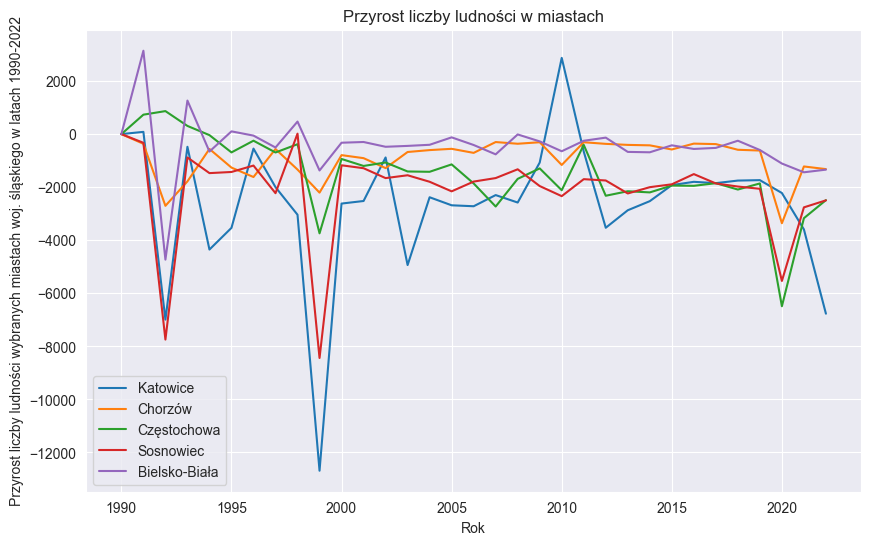

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Rok'], df['Katowice: przyrost'], label='Katowice')
plt.plot(df['Rok'], df['Chorzów: przyrost'], label='Chorzów')
plt.plot(df['Rok'], df['Częstochowa: przyrost'], label='Częstochowa')
plt.plot(df['Rok'], df['Sosnowiec: przyrost'], label='Sosnowiec')
plt.plot(df['Rok'], df['Bielsko-Biała: przyrost'], label='Bielsko-Biała')
plt.title('Przyrost liczby ludności w miastach')
plt.xlabel('Rok')
plt.ylabel('Przyrost liczby ludności wybranych miastach woj. śląskiego w latach 1990-2022')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
mean_katowice_przyrost =  df['Katowice: przyrost'].mean()
mean_chorzow_przyrost = df['Chorzów: przyrost'].mean()
mean_czestochowa_przyrost = df['Częstochowa: przyrost'].mean()
mean_sosnowiec_przyrost = df['Sosnowiec: przyrost'].mean()
mean_bielskobiala_przyrost = df['Bielsko-Biała: przyrost'].mean()
print(mean_katowice_przyrost, mean_chorzow_przyrost, mean_czestochowa_przyrost, mean_sosnowiec_przyrost, mean_bielskobiala_przyrost)

-2624.4848484848485 -908.8484848484849 -1505.3636363636363 -2126.5151515151515 -439.6363636363636


In [9]:
print(f'Katowice traciły średnio {abs(mean_katowice_przyrost):.0f} ludności rocznie.')
print(f'Chorzów tracił średnio {abs(mean_chorzow_przyrost):.0f} ludności rocznie.')
print(f'Częstochowa traciła średnio {abs(mean_czestochowa_przyrost):.0f} ludności rocznie.')
print(f'Sosnowiec tracił średnio {abs(mean_sosnowiec_przyrost):.0f} ludności rocznie.')
print(f'Bielsko-Biała traciła średnio {abs(mean_bielskobiala_przyrost):.0f} ludności rocznie.')

Katowice traciły średnio 2624 ludności rocznie.
Chorzów tracił średnio 909 ludności rocznie.
Częstochowa traciła średnio 1505 ludności rocznie.
Sosnowiec tracił średnio 2127 ludności rocznie.
Bielsko-Biała traciła średnio 440 ludności rocznie.


# Średnia
- Katowice traciły średnio 2624 ludności rocznie.
- Chorzów tracił średnio 909 ludności rocznie.
- Częstochowa traciła średnio 1505 ludności rocznie.
- Sosnowiec tracił średnio 2127 ludności rocznie.
- Bielsko-Biała traciła średnio 440 ludności rocznie.

In [10]:
std_katowice_przyrost = df['Katowice: przyrost'].std()
std_chorzow_przyrost = df['Chorzów: przyrost'].std()
std_czestochowa_przyrost = df['Częstochowa: przyrost'].std()
std_sosnowiec_przyrost = df['Sosnowiec: przyrost'].std()
std_bielskobiala_przyrost = df['Bielsko-Biała: przyrost'].std()
print(std_katowice_przyrost, std_chorzow_przyrost, std_czestochowa_przyrost, std_sosnowiec_przyrost, std_bielskobiala_przyrost)

2595.159136753613 743.7307191287432 1399.4470519231386 1798.6258317325917 1112.8235714327602


In [11]:
print(f'Zmienność przyrostów ludności Katowic wynosi {std_katowice_przyrost:.0f}.')
print(f'Zmienność przyrostów ludności Chorzowa wynosi {std_chorzow_przyrost:.0f}.')
print(f'Zmienność przyrostów ludności Częstochowy wynosi {std_czestochowa_przyrost:.0f}.')
print(f'Zmienność przyrostów ludności Sosnowca wynosi {std_sosnowiec_przyrost:.0f}.')
print(f'Zmienność przyrostów ludności Bielsko-Białej wynosi {std_bielskobiala_przyrost:.0f}.')
print('Największe wahania w liczbie ludności możemy zaobserwować w Katowicach i Bielsko-Białej, najmniejsze w Chorzowie i Sosnowcu')

Zmienność przyrostów ludności Katowic wynosi 2595.
Zmienność przyrostów ludności Chorzowa wynosi 744.
Zmienność przyrostów ludności Częstochowy wynosi 1399.
Zmienność przyrostów ludności Sosnowca wynosi 1799.
Zmienność przyrostów ludności Bielsko-Białej wynosi 1113.
Największe wahania w liczbie ludności możemy zaobserwować w Katowicach i Bielsko-Białej, najmniejsze w Chorzowie i Sosnowcu


# Zmienność
Największe wahania w liczbie ludności możemy zaobserwować w Katowicach i Bielsko-Białej, najmniejsze w Chorzowie i Sosnowcu.
- Zmienność przyrostów ludności Katowic wynosi 2595.
- Zmienność przyrostów ludności Chorzowa wynosi 744.
- Zmienność przyrostów ludności Częstochowy wynosi 1399.
- Zmienność przyrostów ludności Sosnowca wynosi 1799.
- Zmienność przyrostów ludności Bielsko-Białej wynosi 1113.

In [12]:
median_katowice_przyrost = df['Katowice: przyrost'].median()
median_chorzow_przyrost = df['Chorzów: przyrost'].median()
median_czestochowa_przyrost = df['Częstochowa: przyrost'].median()
median_sosnowiec_przyrost = df['Sosnowiec: przyrost'].median()
median_bielskobiala_przyrost = df['Bielsko-Biała: przyrost'].median()
print(median_katowice_przyrost, median_chorzow_przyrost, median_czestochowa_przyrost, median_sosnowiec_przyrost, median_bielskobiala_przyrost)

-2381.0 -603.0 -1421.0 -1790.0 -423.0


In [13]:
print(f'Mediana przyrostów ludności Katowic wynosi {median_katowice_przyrost:.0f}. Mediana ta sugeruje, że połowa lat charakteryzowała się przyrostem ludności na poziomie {median_katowice_przyrost:.0f} osób lub mniej rocznie.')
print(f'Mediana przyrostów ludności Chorzowa wynosi {median_chorzow_przyrost:.0f}. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy {median_chorzow_przyrost:.0f} osób rocznie.')
print(f'Mediana przyrostów ludności Częstochowy wynosi {mean_czestochowa_przyrost:.0f}. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy {median_czestochowa_przyrost:.0f} osób rocznie.')
print(f'Mediana przyrostów ludności Sosnowca wynosi {median_sosnowiec_przyrost:.0f}. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy {median_sosnowiec_przyrost:.0f} osób rocznie.')
print(f'Mediana przyrostów ludności Bielsko-Białej wynosi {median_bielskobiala_przyrost:.0f}. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy {median_bielskobiala_przyrost:.0f} osób rocznie.')

Mediana przyrostów ludności Katowic wynosi -2381. Mediana ta sugeruje, że połowa lat charakteryzowała się przyrostem ludności na poziomie -2381 osób lub mniej rocznie.
Mediana przyrostów ludności Chorzowa wynosi -603. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -603 osób rocznie.
Mediana przyrostów ludności Częstochowy wynosi -1505. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -1421 osób rocznie.
Mediana przyrostów ludności Sosnowca wynosi -1790. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -1790 osób rocznie.
Mediana przyrostów ludności Bielsko-Białej wynosi -423. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -423 osób rocznie.


# Mediana
- Mediana przyrostów ludności Katowic wynosi -2381. Mediana ta sugeruje, że połowa lat charakteryzowała się przyrostem ludności na poziomie -2381 osób lub mniej rocznie.
- Mediana przyrostów ludności Chorzowa wynosi -603. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -603 osób rocznie.
- Mediana przyrostów ludności Częstochowy wynosi -1505. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -1421 osób rocznie.
- Mediana przyrostów ludności Sosnowca wynosi -1790. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -1790 osób rocznie.
- Mediana przyrostów ludności Bielsko-Białej wynosi -423. Dla połowy badanego okresu przyrost ludności był mniejszy lub równy -423 osób rocznie.

In [14]:
uniq_katowice_przyrost = df['Katowice: przyrost'].nunique()
uniq_chorzow_przyrost = df['Chorzów: przyrost'].nunique()
uniq_czestochowa_przyrost = df['Częstochowa: przyrost'].nunique()
uniq_sosnowiec_przyrost = df['Sosnowiec: przyrost'].nunique()
uniq_bielskobiala_przyrost = df['Bielsko-Biała: przyrost'].nunique()
print(uniq_katowice_przyrost, uniq_chorzow_przyrost, uniq_czestochowa_przyrost, uniq_sosnowiec_przyrost, uniq_bielskobiala_przyrost)
dominant_chorzow_przyrost = df['Chorzów: przyrost'].mode().iloc[0]
dominant_czestochowa_przyrost = df['Częstochowa: przyrost'].mode().iloc[0]
print(dominant_chorzow_przyrost, dominant_czestochowa_przyrost) 

33 32 32 33 33
-307 -1860


In [15]:
print(f'Dla Katowic, Sosnowca i Bielsko-Białej nie ma dominanty, każda z wartości występuje tylko raz.')
print(f'Najczęściej występująca wartość dla Chorzowa to {dominant_chorzow_przyrost}.')
print(f'Najczęściej występująca wartość dla Częstochowy to {dominant_czestochowa_przyrost}.')

Dla Katowic, Sosnowca i Bielsko-Białej nie ma dominanty, każda z wartości występuje tylko raz.
Najczęściej występująca wartość dla Chorzowa to -307.
Najczęściej występująca wartość dla Częstochowy to -1860.


# Dominanta
Dla Katowic, Sosnowca i Bielsko-Białej nie ma dominanty, każda z wartości występuje tylko raz.
Najczęściej występująca wartość dla Chorzowa to -307.
Najczęściej występująca wartość dla Częstochowy to -1860.

In [16]:
q1_katowice_przyrost = df['Katowice: przyrost'].quantile(0.25)
q3_katowice_przyrost = df['Katowice: przyrost'].quantile(0.75)
q1_chorzow_przyrost = df['Chorzów: przyrost'].quantile(0.25)
q3_chorzow_przyrost = df['Chorzów: przyrost'].quantile(0.75)
q1_czestochowa_przyrost = df['Częstochowa: przyrost'].quantile(0.25)
q3_czestochowa_przyrost = df['Częstochowa: przyrost'].quantile(0.75)
q1_sosnowiec_przyrost = df['Sosnowiec: przyrost'].quantile(0.25)
q3_sosnowiec_przyrost = df['Sosnowiec: przyrost'].quantile(0.75)
q1_bielskobiala_przyrost = df['Bielsko-Biała: przyrost'].quantile(0.25)
q3_bielskobiala_przyrost = df['Bielsko-Biała: przyrost'].quantile(0.75)
print(f'Katowice: {q1_katowice_przyrost}, {q3_katowice_przyrost}')
print(f'Chorzów: {q1_chorzow_przyrost}, {q3_chorzow_przyrost}')
print(f'Częstochowa: {q1_czestochowa_przyrost}, {q3_czestochowa_przyrost}')
print(f'Sosnowiec: {q1_sosnowiec_przyrost}, {q3_sosnowiec_przyrost}')
print(f'Bielsko-Biała: {q1_bielskobiala_przyrost}, {q3_bielskobiala_przyrost}')

Katowice: -3040.0, -1736.0
Chorzów: -1263.0, -377.0
Częstochowa: -2116.0, -690.0
Sosnowiec: -2158.0, -1428.0
Bielsko-Biała: -659.0, -133.0


# Kwartyle
- Katowice
  - 25% danych przyrostów jest mniejsza bądź równa -3040.
  - 75% danych przyrostów jest mniejsza bądź równa -1736.
- Chorzów
  - 25% danych przyrostów jest mniejsza bądź równa -1263.
  - 75% danych przyrostów jest mniejsza bądź równa -377.
- Częstochowa
  - 25% danych przyrostów jest mniejsza bądź równa -2116.
  - 75% danych przyrostów jest mniejsza bądź równa -690.
- Sosnowiec
  - 25% danych przyrostów jest mniejsza bądź równa -2158.
  - 75% danych przyrostów jest mniejsza bądź równa -1428.
- Bielsko-Biała
  - 25% danych przyrostów jest mniejsza bądź równa -659.
  - 75% danych przyrostów jest mniejsza bądź równa -133.

In [17]:
selected = ['Katowice: przyrost', 'Chorzów: przyrost',
       'Częstochowa: przyrost', 'Sosnowiec: przyrost',
       'Bielsko-Biała: przyrost']
selected_df = df[selected]
cor = selected_df.corr()
cor

,Katowice: przyrost,Chorzów: przyrost,Częstochowa: przyrost,Sosnowiec: przyrost,Bielsko-Biała: przyrost
Katowice: przyrost,1.000000,0.378775,0.236578,0.681268,0.501140
Chorzów: przyrost,0.378775,1.000000,0.302025,0.686090,0.431882
Częstochowa: przyrost,0.236578,0.302025,1.000000,0.418260,0.242943
Sosnowiec: przyrost,0.681268,0.686090,0.418260,1.000000,0.716783
Bielsko-Biała: przyrost,0.501140,0.431882,0.242943,0.716783,1.000000


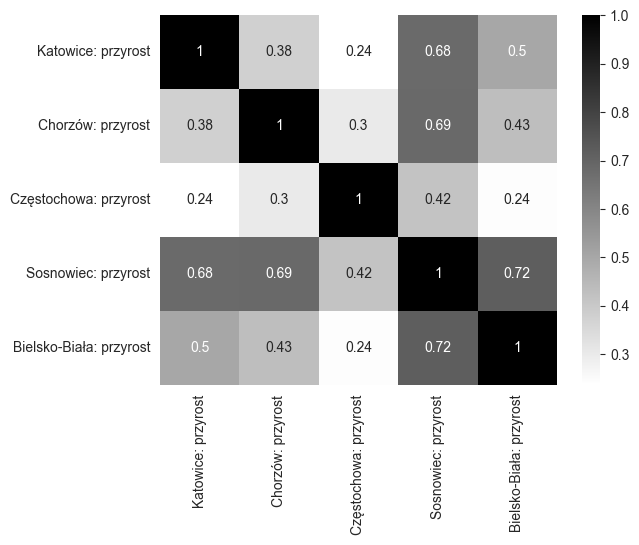

In [18]:
sns.heatmap(cor, annot=True, cmap='binary')
plt.show()

# Korelacja
- Największa korelacja jest pomiędzy przyrostem ludności Bielsko-Białej i Sosnowca.
- Najsłabsza korelacja jest pomiędzy przyrostem ludności Katowic i Częstochowy a także pomiędzy Bielsko-Białą i Częstochową.
# Test istotności korelacji:

In [19]:
kolumny = ['Katowice: przyrost', 'Chorzów: przyrost',
       'Częstochowa: przyrost', 'Sosnowiec: przyrost',
       'Bielsko-Biała: przyrost']
p_value_matrix = pd.DataFrame(index=kolumny, columns=kolumny)
for kol1 in kolumny:
    for kol2 in kolumny:
        if kol1 == kol2:
            p_value_matrix[kol1][kol2] = 0.0
        else:
            korelacja, p_value = pearsonr(df[kol1], df[kol2])
            p_value_matrix[kol1][kol2] = p_value
p_value_matrix = p_value_matrix.astype(float)
p_value_matrix

C:\Users\modeb\AppData\Local\Temp\ipykernel_9148\3237496984.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_value_matrix[kol1][kol2] = 0.0
C:\Users\modeb\AppData\Local\Temp\ipykernel_9148\3237496984.py:11: FutureWarning: ChainedAssignm

,Katowice: przyrost,Chorzów: przyrost,Częstochowa: przyrost,Sosnowiec: przyrost,Bielsko-Biała: przyrost
Katowice: przyrost,0.000000,0.029726,0.184992,0.000013,0.002971
Chorzów: przyrost,0.029726,0.000000,0.087589,0.000010,0.012081
Częstochowa: przyrost,0.184992,0.087589,0.000000,0.015423,0.173104
Sosnowiec: przyrost,0.000013,0.000010,0.015423,0.000000,0.000003
Bielsko-Biała: przyrost,0.002971,0.012081,0.173104,0.000003,0.000000


Dla Katowic i Częstochowy, Chorzowa i Częstochowy, Bielsko-Białej i Częstochowy korelacja nie jest statystycznie istotna. W pozostałych przypadkach korelacja jest statystycznie istotna.

# Test równości średniej dla przyrostów dwóch najludniejszych miast:
Hipoteza zerowa: średnie przyrostów ludności Katowic i Częstochowy są równe.
Hipoteza alternatywna: średnie przyrostów ludności Katowic i Częstochowy nie są równe.

In [20]:
t_stat, p_value = ttest_ind(df['Katowice: przyrost'], df['Częstochowa: przyrost'], equal_var=False)
print(f"T-statystyka: {t_stat}")
print(f"P-wartość: {p_value}")

T-statystyka: -2.180427692281578
P-wartość: 0.03404127672623874


p-wartość 0.03404127672623874 < 0.05, zatem hipotezę zerową należy odrzucić. Miasta średnio traciły znacząco rózną ilość ludzi rocznie.

# Test równości wariancji dla przyrostów dwóch najludniejszych miast:
Hipoteza zerowa: wariancje przyrostów ludności Katowic i Częstochowy sa równe. Hipoteza alternatywna: wariancje przyrostów ludności Katowic i Częstochowy nie są sobie równe.

In [21]:
t_stat, p_value = levene(df['Katowice: przyrost'], df['Częstochowa: przyrost'])
print(f"T-statystyka: {t_stat}")
print(f"P-wartość: {p_value}")

T-statystyka: 2.030961231911157
P-wartość: 0.15898183828758825


p-wartość 0.15898183828758825 > 0.05, zatem brakuje podstaw do odrzucenia hipotezy zerowej. Brak istotnych statystycznie różnic między wariancjami przyrostów ludności Katowic i Częstochowy.

# Obserwacje odstające
Hipoteza zerowa: obserwacja nie jest obserwacją odstającą. Hipoteza alternatywna: obserwacja jest obserwacją odstającą.

In [22]:
columns = ['Katowice: przyrost', 'Chorzów: przyrost',
       'Częstochowa: przyrost', 'Sosnowiec: przyrost',
       'Bielsko-Biała: przyrost']
for column in columns:
    df[f'{column}_zscore'] = zscore(df[column])
    z_score_treshold = 3
    outliers = df.loc[abs(df[f'{column}_zscore']) > 3, f'{column}']
    print(f'Wartości odstające dla {column}:')
    print(outliers)
    print()

Wartości odstające dla Katowice: przyrost:
9   -12690
Name: Katowice: przyrost, dtype: int64

Wartości odstające dla Chorzów: przyrost:
30   -3360
Name: Chorzów: przyrost, dtype: int64

Wartości odstające dla Częstochowa: przyrost:
30   -6490
Name: Częstochowa: przyrost, dtype: int64

Wartości odstające dla Sosnowiec: przyrost:
2   -7746
9   -8440
Name: Sosnowiec: przyrost, dtype: int64

Wartości odstające dla Bielsko-Biała: przyrost:
1    3143
2   -4732
Name: Bielsko-Biała: przyrost, dtype: int64



Dla każdego przyrostu ludności występują wartości odstające, więc hipotezę zerową odrzucamy.

# Jednoczynnikowa analiza wariancji
Hipoteza zerowa: nie ma istotnych różnic między średnimi wartościami. Hipoteza alternatywna: są istotne różnice między średnimi wartościami.

In [23]:
t_stat, p_value = f_oneway(df['Katowice: przyrost'], df['Chorzów: przyrost'], df['Sosnowiec: przyrost'], df['Częstochowa: przyrost'], df['Bielsko-Biała: przyrost'])
print(f"Statystyka testowa ANOVA: {t_stat}")
print(f"P-wartość: {p_value}")

Statystyka testowa ANOVA: 9.406558711997672
P-wartość: 7.453897566539814e-07


p-wartość << 0.05, hipoteza zerowa silnie odrzucona. Istnieją istotne różnice między przyrostami miast.